'memory', 'height', 'width', 'depth', 'square',  'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight, 'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

In [1361]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import ast
import numpy as np
import seaborn as sns
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [1362]:
df = pd.read_csv('../mvideo_features.csv')
df = df.drop_duplicates(subset=df.columns.difference(['product_id']), keep='first').reset_index(drop=True)

df.head(3)
columns_needed = ['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза', 'Количество ядер', 'Технология экрана', 'Разрешение экрана', 'Экран',
                  "Степень защиты", "Разрешение видеосъемки", "Цифровой зум (x)", "Оперативная и встроенная память", 
                  "Вес (г)", "Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", "Мощность блока питания (Вт)", "Встроенная память (ROM) (ГБ)", 
                  'Диагональ дополнительного экрана (")','Разрешение по горизонтали в развернутом виде (Пикс)',
                  "Разрешение по вертикали в развернутом виде (Пикс)",'Диагональ в развернутом виде (")',
                  "Разрешение дополнительного экрана по вертикали (Пикс)","Разрешение дополнительного экрана по горизонтали (Пикс)", 
                  'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)', 'Поддержка беспроводной зарядки', 'brand', 'Встроенный искусственный интеллект',
                  'Количество фронтальных камер (шт)', 'Количество основных камер (шт)', 'Состояние', 'Безрамочный']
target = ['salePrice']

df1 = df[columns_needed + target + ['product_id', 'name']]
df1[["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)"]].head(3)
def choose(row):
    if '0' in str(row['memory2']):
        return row['memory2']
    if '0' in str(row['memory3']):
        return row['memory3']
    return row['memory4']

def get_memory(x):
    if type(x) == float:
        return x
    if type(x) == str:
        f = re.findall(r'[0-9]+', x)
        if type(f[-1]) == str:
            return float(f[-1])
    return x
def get_memory_from_name(x):
    if 'TB' in x:
        f = re.findall(r'[0-9/]+TB', x)
        return get_memory(f[0]) * 1024.0 if len(f) > 0 else np.nan
    if 'GB' in x:
        f = re.findall(r'[0-9/]+GB', x)
        return get_memory(f[0]) if len(f) > 0 else np.nan
    return np.nan

df1['memory2'] = df1["Оперативная и встроенная память"].apply(lambda x: get_memory(x))
df1['memory3'] = df1["Встроенная память (ROM) (ГБ)"].apply(lambda x: get_memory(x))
df1['memory4'] = df1["name"].apply(lambda x: get_memory_from_name(x))
df1['memory'] = df1.apply(choose, axis=1)

df1 = df1.drop(columns=["Оперативная и встроенная память", "Встроенная память (ROM) (ГБ)", 'memory2', 'memory3', 'memory4'])
def get_height(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_width(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x


def get_depth(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if len(f) < 3:
            return np.nan
        if type(f[2]) == str:
            return float(f[2])
    return np.nan

def choose_h(row):
    if row['height1'] !=  np.nan:
        return row['height1']
    return row['height2']
def choose_w(row):
    if row['width1'] !=  np.nan:
        return row['width1']
    return row['width2']
def choose_d(row):
    if row['depth1'] !=  np.nan:
        return row['depth1']
    return row['depth2']


df1['height1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_height(x))
df1['width1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_width(x))
df1['depth1'] = df1["Габаритные размеры (В*Ш*Т)"].apply(lambda x: get_depth(x))

df1['height2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_height(x))
df1['width2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_width(x))
df1['depth2'] = df1["Габаритные размеры (В*Ш*Г)"].apply(lambda x: get_depth(x))

df1['height'] = df1.apply(choose_h, axis=1)
df1['width'] = df1.apply(choose_w, axis=1)
df1['depth'] = df1.apply(choose_d, axis=1)
df1['square'] = df1['height'] * df1['width']
df1['volume'] = df1['height'] * df1['width'] * df1['depth']

df1 = df1.drop(columns=["Габаритные размеры (В*Ш*Т)", "Габаритные размеры (В*Ш*Г)", 
                        'height1', 'height2', 'width1', 'width2', 'depth1', 'depth2'])

def get_res_0(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[0]) == str:
            return float(f[0])
    return x

def get_res_1(x):
    if type(x) == str:
        f = re.findall(r'[0-9.]+', x)
        if type(f[1]) == str:
            return float(f[1])
    return x



df1['video_resolution_v'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_1(x))
df1['video_resolution_h'] = df1["Разрешение видеосъемки"].apply(lambda x: get_res_0(x))

df1['screen_resolution_h'] = df1["Разрешение экрана"].apply(lambda x: get_res_0(x))
df1['screen_resolution_v'] = df1["Разрешение экрана"].apply(lambda x: get_res_1(x))

df1['screen_diag'] = df1["Экран"].apply(lambda x: np.nan if get_res_0(x) > 9.0 else get_res_0(x))


df1 = df1.drop(columns=["Разрешение видеосъемки", "Разрешение экрана", "Экран"])

def get_dust_IP(x):
    if type(x) is str and x[:2] == 'IP':
        if x[2] == 'X':
            return np.nan
        return int(x[2])
    return np.nan

def get_water_IP(x):
    if type(x) is str and  x[:2] == 'IP':
        if x[3] == 'X':
            return np.nan
        return int(x[3])
    return np.nan


df1['dust_IP'] = df1["Степень защиты"].apply(lambda x: get_dust_IP(x))
df1['water_IP'] = df1["Степень защиты"].apply(lambda x: get_water_IP(x))

df1 = df1.drop(columns=["Степень защиты"])

df1['zoom'] = df1['Цифровой зум (x)']
df1['weight'] = df1['Вес (г)']
df1['kernel_cnt'] = df1['Количество ядер']
df1['screen_technology'] = df1['Технология экрана']
df1['power'] = df1['Мощность блока питания (Вт)']

df1 = df1.drop(columns=["Цифровой зум (x)", "Вес (г)", "Количество ядер", "Технология экрана", "Мощность блока питания (Вт)"])

In [1363]:
data = df1

In [1364]:
data['Состояние'].unique()

array(['новый', nan, 'восстановленный'], dtype=object)

In [1365]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

236


In [1366]:
iphone_battery_capacity = {
    'iPhone 16 Pro': 3355,
    'iPhone 16 Pro Max': 4676,
    'iPhone 16': 3561,
    'iPhone 16 Plus': 4006,
    'iPhone 15 Pro': 3274,
    'iPhone 15 Pro Max': 4422,
    'iPhone 15': 3349,
    'iPhone 15 Plus': 4383,
    'iPhone 14 Pro': 3200,
    'iPhone 14 Pro Max': 4323,
    'iPhone 14': 3279,
    'iPhone 14 Plus': 4325,
    'iPhone 13 Pro': 3095,
    'iPhone 13 Pro Max': 4352,
    'iPhone 13': 3227,
    'iPhone 13 mini': 2406,
    'iPhone SE (2022)': 2018,
    'iPhone SE (2020)': 1821,
    'iPhone 12 Pro': 2815,
    'iPhone 12 Pro Max': 3687,
    'iPhone 12': 2815,
    'iPhone 12 mini': 2227,
    'iPhone 11 Pro': 3046,
    'iPhone 11 Pro Max': 3969,
    'iPhone 11': 3110,
    'iPhone XR': 2942,
    'iPhone XS': 2658,
    'iPhone XS Max': 3174,
    'iPhone X': 2716,
    'iPhone 8 Plus': 2691,
    'iPhone 8': 1821
}

# Нормализуем словарь: убираем "iPhone ", приводим к нижнему регистру
normalized_battery_capacity = {
    model.lower().replace('iphone ', '').strip(): capacity
    for model, capacity in iphone_battery_capacity.items()
}
# print(normalized_battery_capacity)

def fill_iphone_capacity(row):
    if pd.isna(row['Емкость аккумулятора (мАч)']):
        # Приводим серию к тому же формату
        series = str(row['Серия']).lower().replace('iphone', '').replace('apple', '').strip()
        # print(series)
        return normalized_battery_capacity.get(series, row['Емкость аккумулятора (мАч)'])
    return row['Емкость аккумулятора (мАч)']

data['Емкость аккумулятора (мАч)'] = data.apply(fill_iphone_capacity, axis=1)


In [1367]:
data[['Емкость аккумулятора (мАч)', 'brand', 'Серия']][data.brand == 'Apple']

,Емкость аккумулятора (мАч),brand,Серия
0,3227.0,Apple,iPhone 13
3,3355.0,Apple,iPhone 16 Pro
10,4676.0,Apple,iPhone 16 Pro Max
11,4676.0,Apple,iPhone 16 Pro Max
12,4676.0,Apple,iPhone 16 Pro Max
...,...,...,...
919,4422.0,Apple,iPhone 15 Pro Max
921,3355.0,Apple,Apple iPhone 16 Pro
924,3274.0,Apple,iPhone 15 Pro
925,3355.0,Apple,iPhone 16 Pro


In [1368]:
print(data['Емкость аккумулятора (мАч)'].isna().sum())

4


In [1369]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'Емкость аккумулятора (мАч)',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Количество фронтальных камер (шт)', 'Количество основных камер (шт)',
       'Состояние', 'Безрамочный', 'salePrice', 'product_id', 'name', 'memory',
       'height', 'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power

In [1370]:
data['standarts'] = data['Поддержка стандартов'].apply(lambda x: re.split(r'[ /]', str(x)))
data['is_5G'] = data['standarts'].apply(lambda x: '5G' in x if isinstance(x, list) else False)
data['is_5G'] = data['is_5G'].astype(int)
data['year'] = np.where(data['Год релиза'] != 2028, data['Год релиза'], 2023)
data['quick_charge'] = (data['Поддержка быстрой зарядки'] == 'Да').astype(int)
# data.rename(columns={'Поддержка быстрой зарядки' : 'quick_charge'}, inplace=True)
data['wireless_charging'] = (data['Поддержка беспроводной зарядки'] == 'Да').astype(int)
data['ai'] = (data['Встроенный искусственный интеллект'] == 'Да').astype(int)
bin_size = 100
mean_battery = data['Емкость аккумулятора (мАч)'].mean()
data['battery_bin'] = (
	pd.to_numeric(data['Емкость аккумулятора (мАч)'], errors='coerce')
	.fillna(mean_battery)
	.apply(lambda x: int(x) // bin_size * bin_size if not pd.isna(x) else np.nan)
)
data['frameless'] = (data['Безрамочный'] == 'Да').astype(int)
data['used'] = (data['Состояние'] == 'восстановленный').astype(int)
data = data.rename(columns={'Емкость аккумулятора (мАч)' : 'battery', 
                            'Количество основных камер (шт)' : 'main_cams',
                            })

data['dop_screen'] = (data['Диагональ дополнительного экрана (")'].isna()).astype(int)
data['is_fold'] = (data['Диагональ в развернутом виде (")'].isna()).astype(int)

Модель 1

In [1371]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 05 May 2025   Prob (F-statistic):          7.14e-183
Time:                        20:42:12   Log-Likelihood:                -10944.
No. Observations:                 929   AIC:                         2.192e+04
Df Residuals:                     915   BIC:                         2.198e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.697e+05   4

'is_5G', 'Год релиза', 'Поддержка быстрой зарядки' , 'battery_bin', 'Поддержка беспроводной зарядки', 
'brand', 'Гарантия предоставляется', 'Страна', 'Количество основных камер (шт)', 'Сумма Мпикс основной камеры', 'Материал корпуса'

Модель 2

In [1372]:
data.columns

Index(['Серия', 'Поддержка SIM карт', 'Поддержка стандартов', 'Год релиза',
       'Диагональ дополнительного экрана (")',
       'Разрешение по горизонтали в развернутом виде (Пикс)',
       'Разрешение по вертикали в развернутом виде (Пикс)',
       'Диагональ в развернутом виде (")',
       'Разрешение дополнительного экрана по вертикали (Пикс)',
       'Разрешение дополнительного экрана по горизонтали (Пикс)',
       'Поддержка быстрой зарядки', 'battery',
       'Поддержка беспроводной зарядки', 'brand',
       'Встроенный искусственный интеллект',
       'Количество фронтальных камер (шт)', 'main_cams', 'Состояние',
       'Безрамочный', 'salePrice', 'product_id', 'name', 'memory', 'height',
       'width', 'depth', 'square', 'volume', 'video_resolution_v',
       'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v',
       'screen_diag', 'dust_IP', 'water_IP', 'zoom', 'weight', 'kernel_cnt',
       'screen_technology', 'power', 'standarts', 'is_5G', 'year',
       

In [1373]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.51e-289
Time:                        20:42:13   Log-Likelihood:                -10680.
No. Observations:                 929   AIC:                         2.140e+04
Df Residuals:                     910   BIC:                         2.149e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.569e+07   1

Дамми на бренды

In [1374]:
brand_counts = data['brand'].value_counts()
print(brand_counts)

brand
Apple       236
Samsung     181
Xiaomi      121
Tecno        73
realme       65
HONOR        56
HUAWEI       47
Infinix      38
vivo         37
POCO         35
OPPO         34
Motorola      2
Nubia         1
Redmi         1
Nothing       1
OnePlus       1
Name: count, dtype: int64


In [1375]:
data['brand_Apple'] = (data['brand'] == 'Apple').astype(int)
data['brand_Samsung'] = (data['brand'] == 'Samsung').astype(int)
data['brand_Xiaomi'] = (data['brand'] == 'Xiaomi').astype(int)
data['brand_Tecno'] = (data['brand'] == 'Tecno').astype(int)
data['brand_HONOR'] = (data['brand'] == 'HONOR').astype(int)
data['brand_HUAWEI'] = (data['brand'] == 'HUAWEI').astype(int)
data['brand_Infinix'] = (data['brand'] == 'Infinix').astype(int)
data['brand_POCO'] = (data['brand'] == 'POCO').astype(int)
data['brand_OPPO'] = (data['brand'] == 'OPPO').astype(int)
data['brand_Motorola'] = (data['brand'] == 'Motorola').astype(int)

In [1376]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'is_5G', 'year', 'quick_charge', 'battery_bin', 'wireless_charging', 
            'brand_Apple', 'brand_Samsung', 'brand_Infinix']

target = 'salePrice'
X = data[features]
y = data[target]
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 05 May 2025   Prob (F-statistic):          2.03e-322
Time:                        20:42:14   Log-Likelihood:                -10594.
No. Observations:                 929   AIC:                         2.123e+04
Df Residuals:                     907   BIC:                         2.134e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.647e+07   1

In [1377]:
features = ['memory', 'height', 'width', 'depth', 'square',  
            'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 
            'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight', 
            'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery',
            'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams', 'used', 'frameless', 'dop_screen', 'is_fold']

target = 'salePrice'
X = data[features]
y = np.log(data[target])
X_filled = X.fillna(X.mean())
X_filled = sm.add_constant(X_filled)
model_sm = sm.OLS(y, X_filled).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     484.9
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:42:16   Log-Likelihood:                 83.788
No. Observations:                 929   AIC:                            -111.6
Df Residuals:                     901   BIC:                             23.78
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -162.8783    

Выбросы

Рассмотрим объекты, которые будут считаться выбросами по трем методам

1. Стьюдентизированные остатки 

$$ e_i^{'} = \frac{e_i}{s(i)\sqrt{1 - h_i}} \sim t_{n - k} $$

где: 

$e_i$ - остаток по конктретному наблюдению, полученный по уравнению регрессии с учетом $i$-го наблюдения.

$s(i)$ - стандартное отклонение остатков, полученное по уравнению регрессии, построенному по тому же набору наблюдений, но без $i$-го. 

$h_i$ - диагональный элемент матрицы $X(X'X)^{-1}X'$

В качестве интервала будем использовать 95% доверительный интервал для $t_{n - k} = t_{124}$

Критические значения в таком случае: $t_1 = -1.98, t_2 = 1.98$

2. Точки Левериджа
   
Пусть $h_i$ - $i$-ый диагональный элемент матрицы проектора $X(X'X)^{-1}X'$. Тогда точки Левериджа: 

$$ h_i > \frac{2k}{n} $$ 

 где $k$ - число регрессоров, $n$ - число наблюдений.

Такие точки можно считать выбросами

3. DFFITS

$$ DFFITS_i = e_i^{'}\cdot \sqrt{\frac{h_i}{1 - h_i}} $$

Если $DFFITS_i > 2 \cdot \sqrt{\frac{k}{n}} \Rightarrow i$-ое наблюдение может быть выбросом.

Стьюдентизированные остатки:

In [1378]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


Критические значения: t1 = -1.96, t2 = 1.96


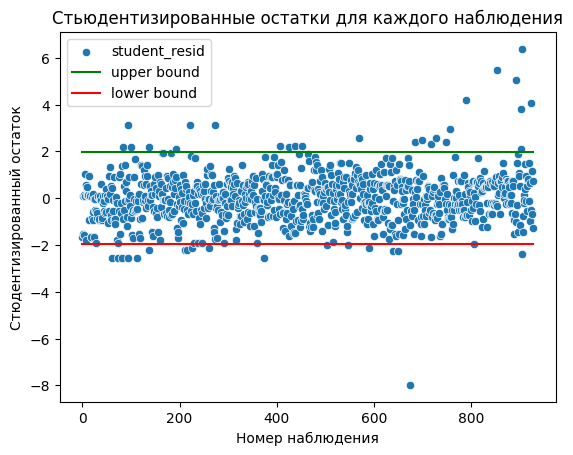

Удалено 13 выбросов. Размер X_filled_clean: (916, 28)


In [1379]:
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wo_const = X_filled.drop(columns=["const"], errors="ignore")  # если добавляла константу
X_scaled = scaler.fit_transform(X_wo_const)
X_scaled = pd.DataFrame(X_scaled, index=X_filled.index, columns=X_wo_const.columns)

# Теперь добавь константу
X_scaled["const"] = 1
n, k = X_scaled.shape

# Стьюдентизированные остатки
alpha = 0.05
dfree = n - k  # n и k уже определены выше
t_crit = t.ppf(1 - alpha/2, dfree)
print(f"Критические значения: t1 = {-t_crit:.2f}, t2 = {t_crit:.2f}")
st_errors = model_sm.outlier_test()
fig, ax = plt.subplots()
n, k = X_scaled.shape
sns.scatterplot(data=st_errors, x=st_errors.index, y = "student_resid", ax=ax, label="student_resid")
sns.lineplot(x=st_errors.index, y=[1.96]*n, ax=ax, label="upper bound", color="green")
sns.lineplot(x=st_errors.index, y=[-1.96]*n, ax=ax, label="lower bound", color="red")
plt.title("Стьюдентизированные остатки для каждого наблюдения")
plt.xlabel("Номер наблюдения")
plt.ylabel("Стюдентизированный остаток")
plt.show()
outliers_test_1 = st_errors[(st_errors["student_resid"] >= 1.96) | (st_errors["student_resid"] <= -1.96)][["student_resid"]]
outliers_test_1["index"] = outliers_test_1.index
outliers_test_1 = outliers_test_1[["student_resid", "index"]]
# outliers_test_1
# Левериндж
X = X_scaled.to_numpy()
XTX_inv = np.linalg.inv(X.T @ X) # обратная матрица X'X
leverage = np.diag(X @ XTX_inv @ X.T) # диагональные элементы - точки левериджа

# Создадим DataFrame linreg_data с нужными столбцами
linreg_data = X_scaled.copy()
linreg_data["leverage"] = leverage
linreg_data["index"] = linreg_data.index
linreg_data = linreg_data.merge(st_errors[["student_resid"]], left_index=True, right_index=True)
linreg_data["index"] = linreg_data.index  # убедимся, что индекс есть

# Порог для левериджа
const = 2 * k / n

# Найдем выбросы по левериджу
outliers_test_2 = linreg_data[linreg_data["leverage"] > const][["index", "leverage"]]
outliers_test_2
linreg_data["DFFITS"] = linreg_data["student_resid"] * np.sqrt(linreg_data["leverage"] / (1 - linreg_data["leverage"]))

const = 2 * np.sqrt(k / n)

outliers_test_3 = linreg_data[linreg_data["DFFITS"].abs() > const][["index", "DFFITS"]]
# Получаем индексы выбросов по каждому тесту
outlier_idx_1 = set(outliers_test_1['index'])
outlier_idx_2 = set(outliers_test_2['index'])
outlier_idx_3 = set(outliers_test_3['index'])

# Находим пересечение индексов (выбросы по всем трем тестам)
outlier_idx_all = outlier_idx_1 & outlier_idx_2 & outlier_idx_3

# Удаляем эти строки из X_filled
X_filled_clean = X_filled.drop(index=outlier_idx_all)
y_clean = y.drop(index=outlier_idx_all)

print(f"Удалено {len(outlier_idx_all)} выбросов. Размер X_filled_clean: {X_filled_clean.shape}")

In [1380]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery',
       'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams',
       'used', 'frameless', 'dop_screen', 'is_fold'],
      dtype='object')

In [1381]:
model_sm = sm.OLS(y_clean, X_filled_clean).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     604.8
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:42:26   Log-Likelihood:                 182.87
No. Observations:                 916   AIC:                            -309.7
Df Residuals:                     888   BIC:                            -174.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -170.6069    

Проверка предпосылок теоремы Гаусса-Маркова:

Несмещенность ошибок

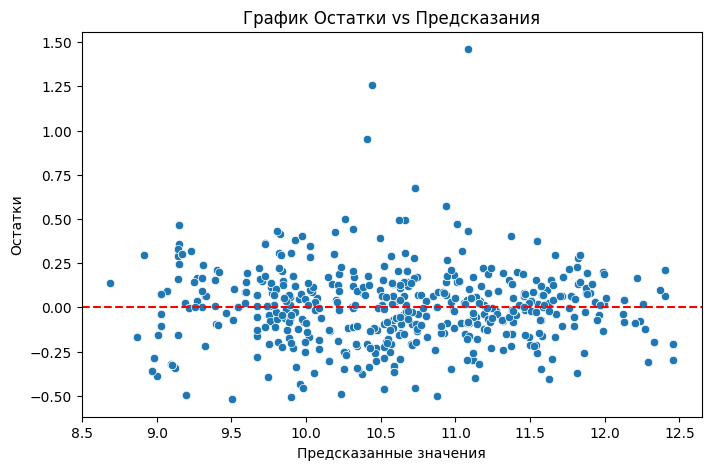

In [1382]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

Мультиколлинеарность

In [1383]:
X_filled_clean.columns

Index(['const', 'memory', 'height', 'width', 'depth', 'square',
       'video_resolution_v', 'video_resolution_h', 'screen_resolution_h',
       'screen_resolution_v', 'screen_diag', 'dust_IP', 'water_IP', 'weight',
       'is_5G', 'year', 'quick_charge', 'wireless_charging', 'battery',
       'brand_Apple', 'brand_Samsung', 'brand_Infinix', 'zoom', 'main_cams',
       'used', 'frameless', 'dop_screen', 'is_fold'],
      dtype='object')

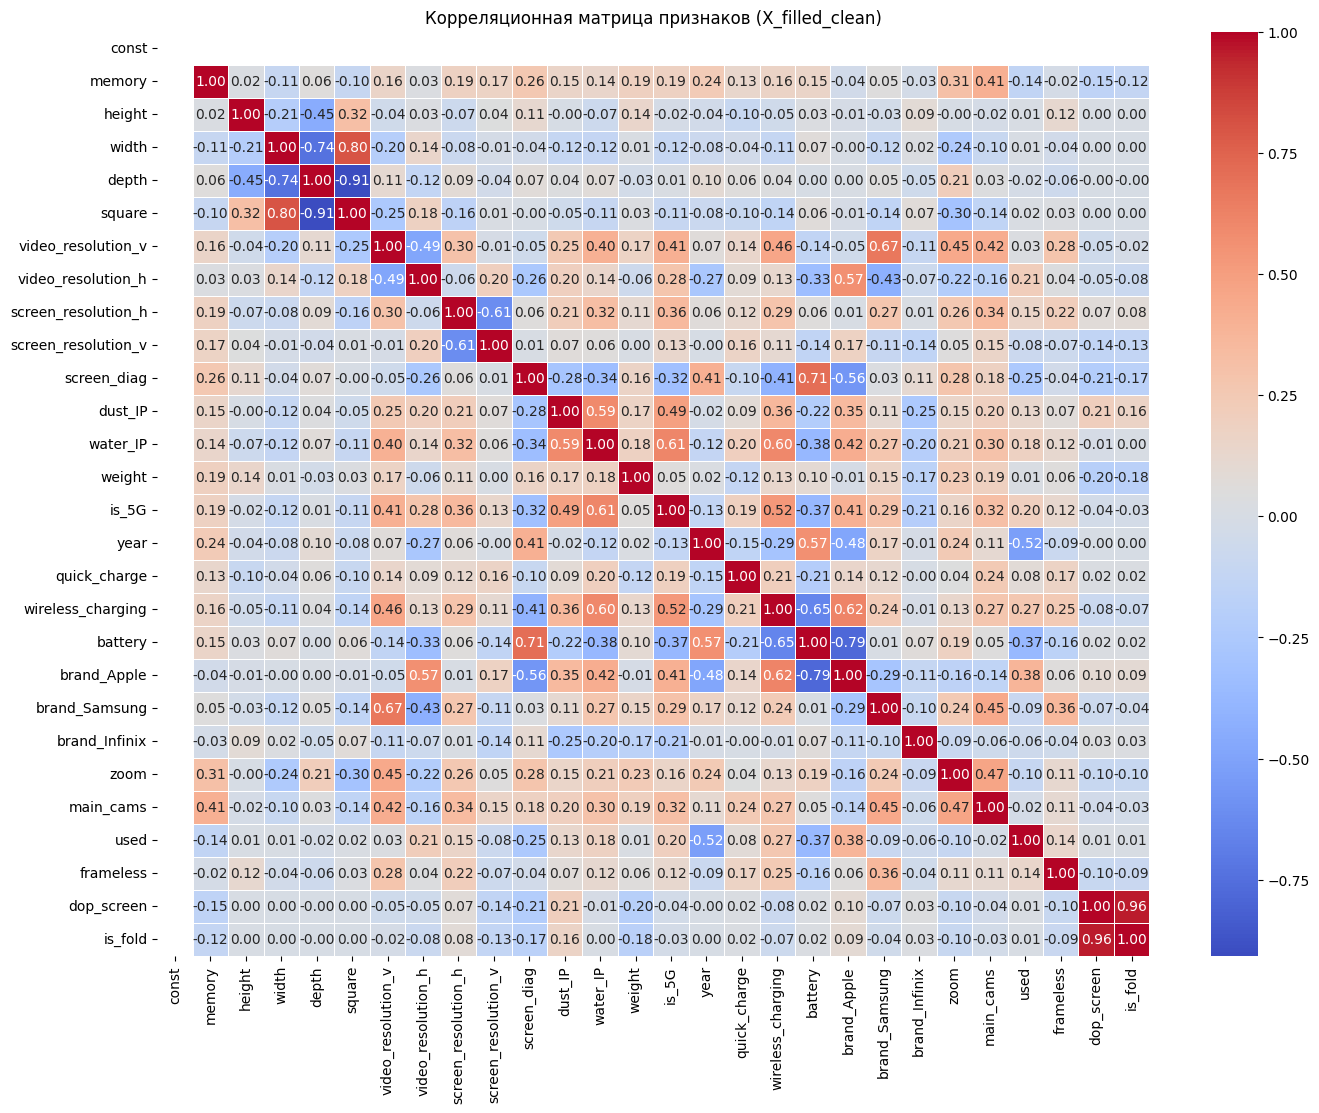

In [1384]:
corr_matrix = X_filled_clean.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

VIF

In [1385]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)


                feature        VIF
0                 width  32.039226
1                 depth  29.155671
2                height  16.437097
3            dop_screen  15.442119
4               is_fold  13.999951
5                square  11.753216
6           brand_Apple   8.015119
7               battery   6.530503
8   screen_resolution_h   4.532098
9     wireless_charging   4.247165
10   video_resolution_v   4.139256
11  screen_resolution_v   3.646474
12          screen_diag   3.511602
13   video_resolution_h   3.269163
14        brand_Samsung   3.133260
15                is_5G   2.991335
16             water_IP   2.696599
17            main_cams   2.423186
18              dust_IP   2.150604
19                 year   2.061956
20                 zoom   1.913640
21               weight   1.577107
22               memory   1.563772
23                 used   1.535382
24            frameless   1.519695
25         quick_charge   1.299295
26        brand_Infinix   1.270706
27                co

In [1386]:
X_filled_clean = X_filled_clean.drop(columns=['square', 'depth'])
X_filled_clean['P/2'] = X_filled_clean['height'] + X_filled_clean['width'] 
X_filled_clean = X_filled_clean.drop(columns=['height', 'width'])
model_sm = sm.OLS(y_clean, X_filled_clean).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     587.0
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:42:40   Log-Likelihood:                 117.57
No. Observations:                 916   AIC:                            -185.1
Df Residuals:                     891   BIC:                            -64.63
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -192.0827    

In [1387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Исключаем константу перед расчётом VIF
X_vif = X_filled_clean.drop(columns=['const'])

# Обновим масштабирование (если нужно), но если ты недавно это делал, можно пропустить
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)
X_scaled = pd.DataFrame(X_scaled, columns=X_vif.columns)

# Добавим константу, как требует statsmodels
X_scaled = sm.add_constant(X_scaled)

# Рассчитаем VIF для всех признаков, включая const
vif_data = pd.DataFrame({
    'feature': X_scaled.columns,
    'VIF': [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
})

# Отсортируем по убыванию VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print(vif_data)

                feature        VIF
0            dop_screen  15.183474
1               is_fold  13.862244
2           brand_Apple   6.790313
3               battery   6.285477
4   screen_resolution_h   4.295071
5     wireless_charging   4.042522
6    video_resolution_v   4.002667
7   screen_resolution_v   3.505122
8    video_resolution_h   3.224567
9         brand_Samsung   3.096258
10                is_5G   2.939852
11          screen_diag   2.921017
12             water_IP   2.584406
13            main_cams   2.393325
14              dust_IP   2.049453
15                 year   2.041520
16                 zoom   1.806513
17               memory   1.553489
18                 used   1.530529
19            frameless   1.458988
20               weight   1.359155
21         quick_charge   1.287508
22        brand_Infinix   1.238798
23                  P/2   1.180757
24                const   1.000000


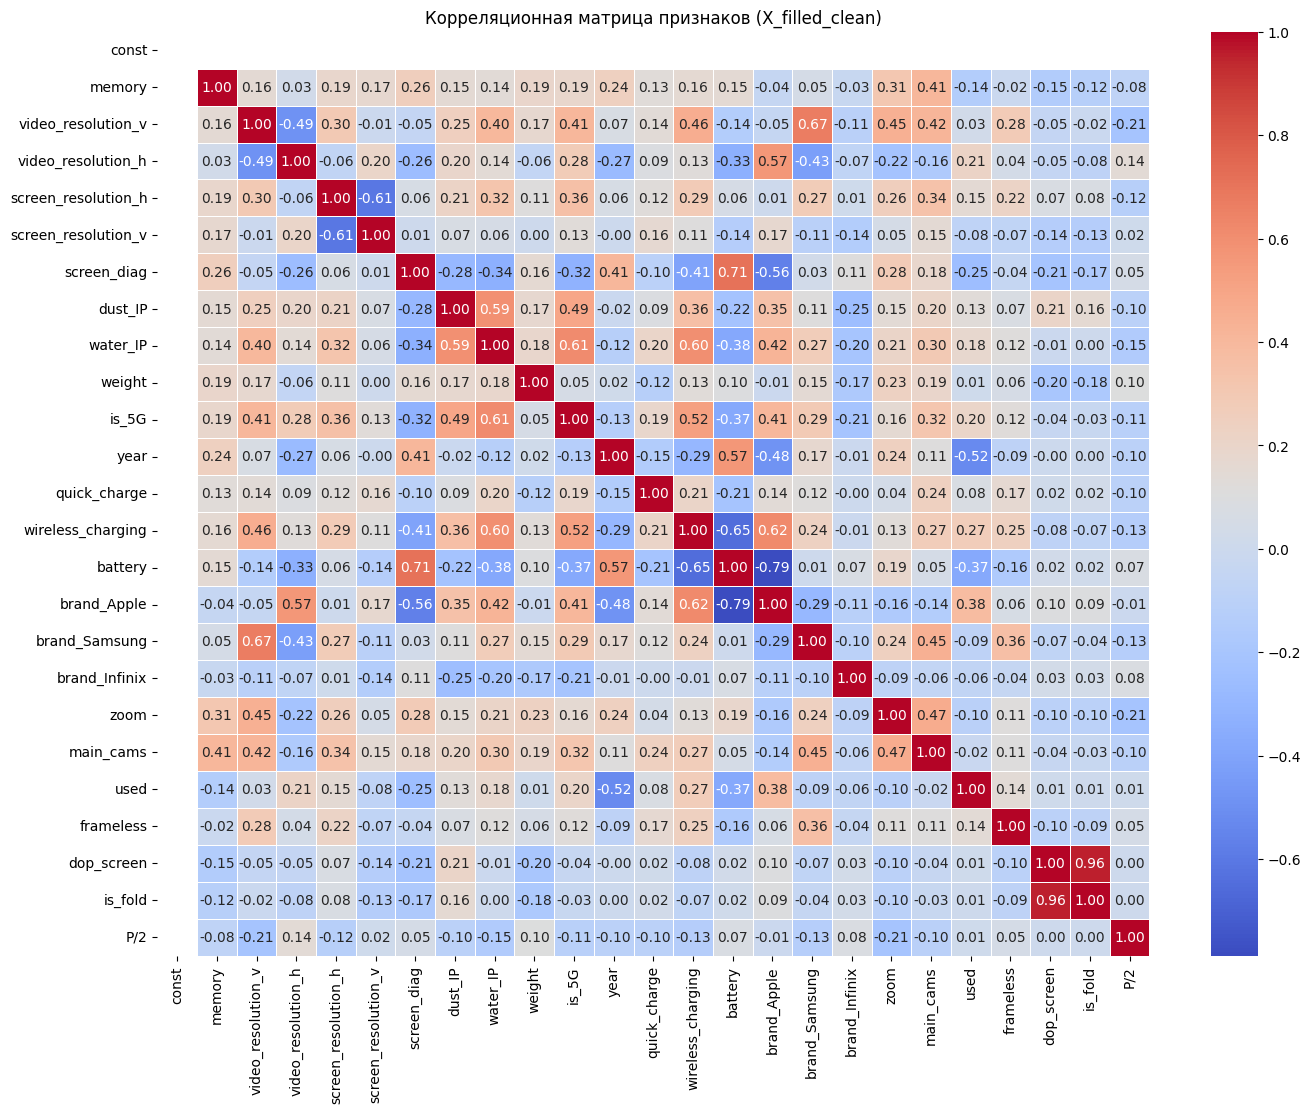

In [1388]:
corr_matrix = X_filled_clean.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Корреляционная матрица признаков (X_filled_clean)")
plt.show()

Гетероскедантичность

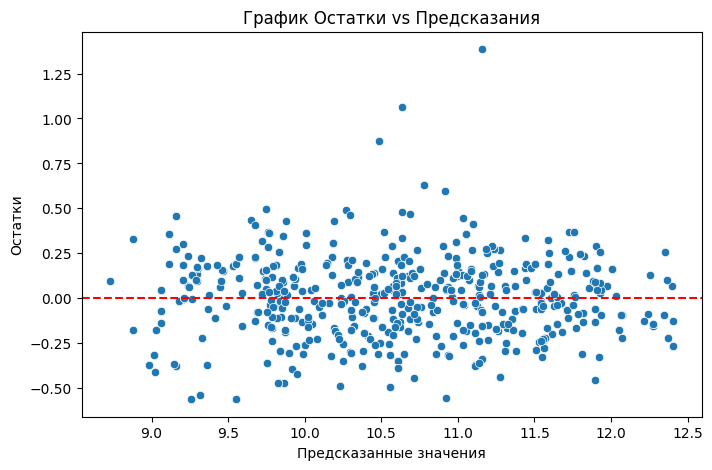

In [1389]:
# Получаем предсказания и остатки для модели model_sm
y_pred = model_sm.fittedvalues
residuals = model_sm.resid

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График Остатки vs Предсказания')
plt.show()

In [1390]:
from statsmodels.stats.diagnostic import het_white

# Тест Уайта на гетероскедастичность
# residuals и X_filled_clean уже определены выше
white_test = het_white(residuals, X_filled_clean)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for name, value in zip(labels, white_test):
    print(f"{name}: {value:.4f}")

Test Statistic: 474.2882
Test Statistic p-value: 0.0000
F-Statistic: 2.6198
F-Test p-value: 0.0000


Функциональная форма - тесты Глейзера

In [1391]:
from statsmodels.formula.api import ols

# Для теста Глейзера: регрессируем абсолютные остатки на каждый признак и его логарифм
glazer_results = []

# Создадим копию с переименованием столбцов, чтобы имена были валидными для patsy
X_filled_clean_safe = X_filled_clean.rename(columns=lambda x: x.replace('/', '_') if '/' in x else x)

for feature in X_filled_clean_safe.columns:
    if feature == 'const':
        continue
    abs_resid = np.abs(residuals)
    # Проверяем, есть ли отрицательные значения (для логарифма)
    if (X_filled_clean_safe[feature] > 0).all():
        X_feat = X_filled_clean_safe[feature]
        X_feat_log = np.log(X_feat)
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat,
            f'log_{feature}': X_feat_log
        })
        model = ols(f'abs_resid ~ {feature} + log_{feature}', data=df_glazer).fit()
    else:
        X_feat = X_filled_clean_safe[feature]
        df_glazer = pd.DataFrame({
            'abs_resid': abs_resid,
            feature: X_feat
        })
        model = ols(f'abs_resid ~ {feature}', data=df_glazer).fit()
    pvalues = model.pvalues
    glazer_results.append({
        'feature': feature,
        'pval_linear': pvalues[1] if len(pvalues) > 1 else np.nan,
        'pval_log': pvalues[2] if len(pvalues) > 2 else np.nan
    })

glazer_df = pd.DataFrame(glazer_results)
print(glazer_df)

                feature  pval_linear  pval_log
0                memory     0.167874  0.171619
1    video_resolution_v     0.237525  0.076053
2    video_resolution_h     0.007113  0.030285
3   screen_resolution_h     0.744879  0.956260
4   screen_resolution_v     0.048460  0.021549
5           screen_diag     0.157140  0.131286
6               dust_IP     0.021190  0.021697
7              water_IP     0.172676       NaN
8                weight     0.114114  0.198782
9                 is_5G     0.000878       NaN
10                 year     0.000100  0.000100
11         quick_charge     0.000405       NaN
12    wireless_charging     0.000065       NaN
13              battery     0.013794  0.057930
14          brand_Apple     0.000006       NaN
15        brand_Samsung     0.011039       NaN
16        brand_Infinix     0.003323       NaN
17                 zoom     0.109038  0.125014
18            main_cams     0.146540  0.073988
19                 used     0.014634       NaN
20           

In [1392]:
model_sm = sm.OLS(y_clean, X_filled_clean).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     702.9
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:43:17   Log-Likelihood:                 117.57
No. Observations:                 916   AIC:                            -185.1
Df Residuals:                     891   BIC:                            -64.63
Df Model:                          24                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -192.0827    

In [1393]:
# Вывести признаки и их p-value
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()
print("\nЗначимые признаки на 5% уровне значимости:")
print(significant_features)

# Если хотим получить новый датафрейм только с этими признаками:
X_significant = X_filled_clean[significant_features]

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.0003
screen_resolution_h  0.0000
screen_resolution_v  0.0000
screen_diag          0.0000
dust_IP              0.0000
water_IP             0.3469
weight               0.0000
is_5G                0.0000
year                 0.0000
quick_charge         0.0542
wireless_charging    0.0000
battery              0.0002
brand_Apple          0.0000
brand_Samsung        0.0397
brand_Infinix        0.1333
zoom                 0.2129
main_cams            0.0000
used                 0.0000
frameless            0.0719
dop_screen           0.0000
is_fold              0.4750
P/2                  0.0037

Значимые признаки на 5% уровне значимости:
['const', 'memory', 'video_resolution_v', 'video_resolution_h', 'screen_resolution_h', 'screen_resolution_v', 'screen_diag', 'dust_IP', 'weight', 'is_5G', 'year', 'wireless_charging', 'battery', 'brand_Apple', 'brand_Samsung', 'main_cams',

In [1394]:
X_filled_clean['IP'] = X_filled_clean['dust_IP'] + X_filled_clean['water_IP']
X_filled_clean = X_filled_clean.drop(columns=['dust_IP', 'water_IP', 'battery', 'screen_diag', 'quick_charge'])
model_sm = sm.OLS(y_clean, X_filled_clean).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     760.5
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:43:18   Log-Likelihood:                 89.621
No. Observations:                 916   AIC:                            -137.2
Df Residuals:                     895   BIC:                            -36.02
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -203.5290    

In [1395]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0000
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.0000
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.0000
is_5G                0.0000
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.2229
brand_Infinix        0.0241
zoom                 0.5929
main_cams            0.0000
used                 0.0000
frameless            0.0603
dop_screen           0.0239
is_fold              0.0038
P/2                  0.0045
IP                   0.0000


Функциональная форма:

In [1396]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=22.483352701464906, p=2.465844292463371e-06, df_denom=894, df_num=1>


In [1397]:
X_filled_clean['is_5G_year'] = X_filled_clean['is_5G'] * X_filled_clean['year']
X_filled_clean['brand_Apple_memory'] = X_filled_clean['brand_Apple'] * X_filled_clean['memory']
model_sm = sm.OLS(y_clean, X_filled_clean).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:43:18   Log-Likelihood:                 95.002
No. Observations:                 916   AIC:                            -144.0
Df Residuals:                     893   BIC:                            -33.14
Df Model:                          22                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -133.5884    

In [1398]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0032
memory               0.0000
video_resolution_v   0.0000
video_resolution_h   0.0000
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.0000
is_5G                0.0419
year                 0.0017
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.1661
brand_Infinix        0.0134
zoom                 0.7319
main_cams            0.0000
used                 0.0000
frameless            0.0498
dop_screen           0.1422
is_fold              0.0131
P/2                  0.0085
IP                   0.0000
is_5G_year           0.0412
brand_Apple_memory   0.0195


In [1399]:
X_filled_clean['year_sq'] = (X_filled_clean['year'] - X_filled_clean['year'].mean())**4
X_filled_clean['IP_sq'] = X_filled_clean['IP']**2
X_filled_clean['video_resolution_v_sq'] = X_filled_clean['video_resolution_v']**2
X_filled_clean['video_resolution_h_sq'] = X_filled_clean['video_resolution_h']**2
X_filled_clean['memory_sq'] = X_filled_clean['memory']**2
X_filled_clean = X_filled_clean.drop(columns=['IP', 'video_resolution_v', 'video_resolution_h','memory'])
model_sm = sm.OLS(y_clean, X_filled_clean).fit(cov_type='HC3')
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              salePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     244.7
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        20:43:19   Log-Likelihood:                 54.105
No. Observations:                 916   AIC:                            -60.21
Df Residuals:                     892   BIC:                             55.47
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -171.85

In [1400]:
pvalues = model_sm.pvalues
print("Признак\t\tp-value")
for feature_name, pval in pvalues.items():
    print(f"{feature_name:20s} {pval:.4f}")

# Оставить только значимые на 5% уровне признаки (p-value < 0.05)
significant_features = pvalues[pvalues < 0.05].index.tolist()

Признак		p-value
const                0.0001
screen_resolution_h  0.0000
screen_resolution_v  0.0000
weight               0.0000
is_5G                0.0205
year                 0.0000
wireless_charging    0.0000
brand_Apple          0.0000
brand_Samsung        0.8594
brand_Infinix        0.0452
zoom                 0.7656
main_cams            0.0000
used                 0.0000
frameless            0.0148
dop_screen           0.0483
is_fold              0.0368
P/2                  0.0206
is_5G_year           0.0201
brand_Apple_memory   0.9633
year_sq              0.0053
IP_sq                0.0000
video_resolution_v_sq 0.0000
video_resolution_h_sq 0.0000
memory_sq            0.0000


In [1401]:
from statsmodels.stats.diagnostic import linear_reset
reset_test = linear_reset(model_sm, power=2, use_f=True)
print(reset_test)

<F test: F=19.17534577671739, p=1.3339708028470018e-05, df_denom=891, df_num=1>


In [1402]:
float(4e-06)

4e-06

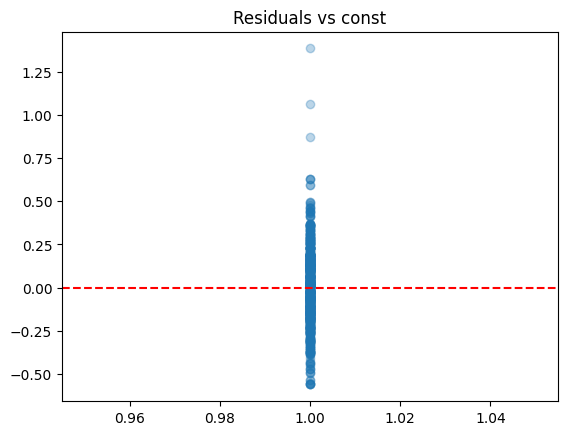

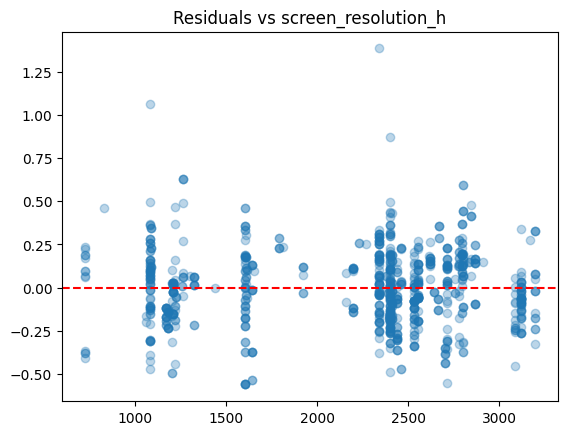

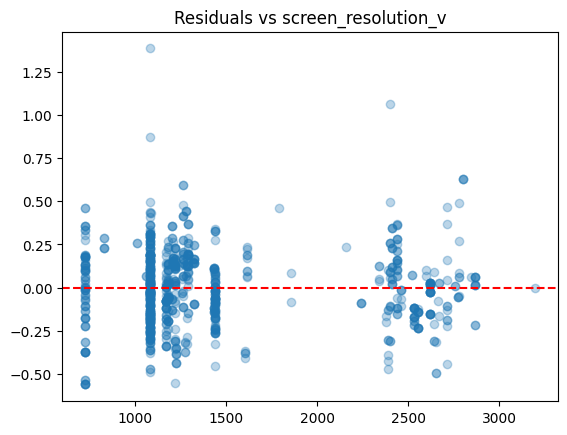

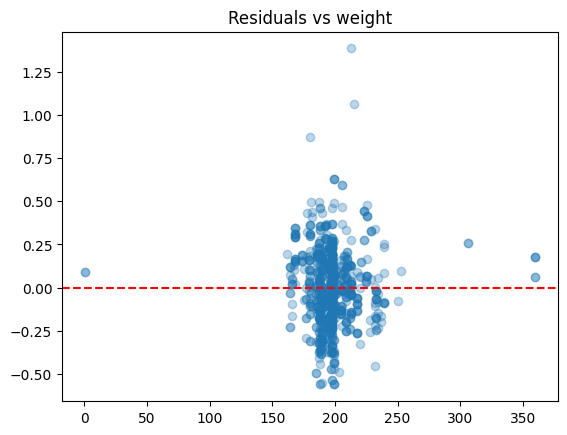

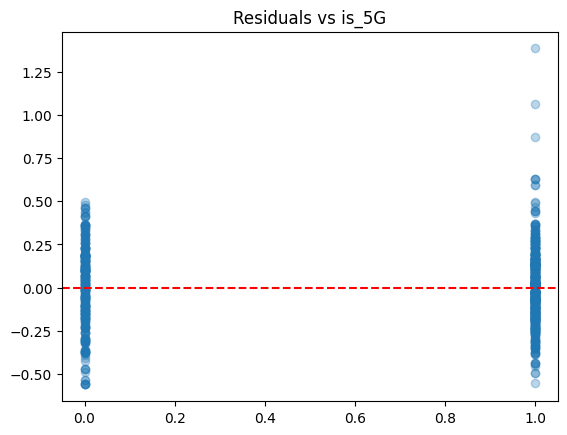

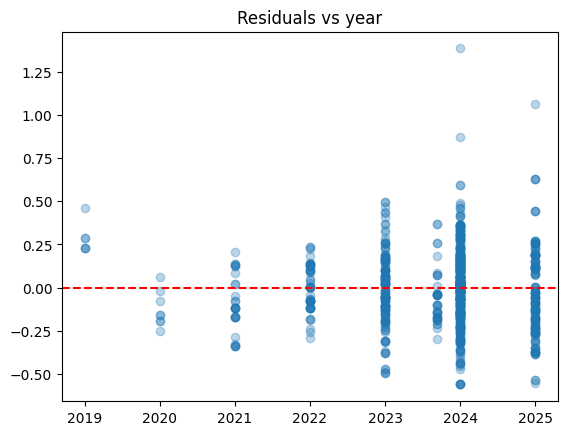

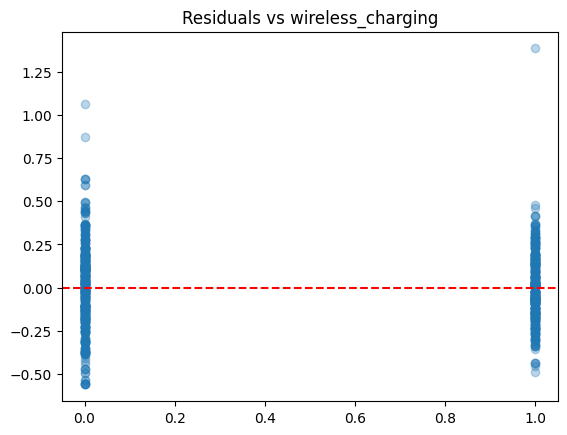

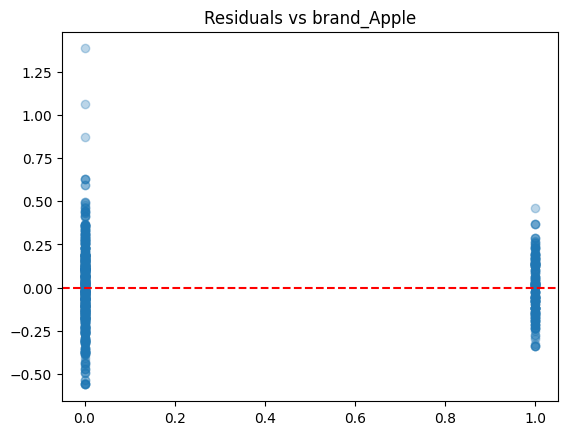

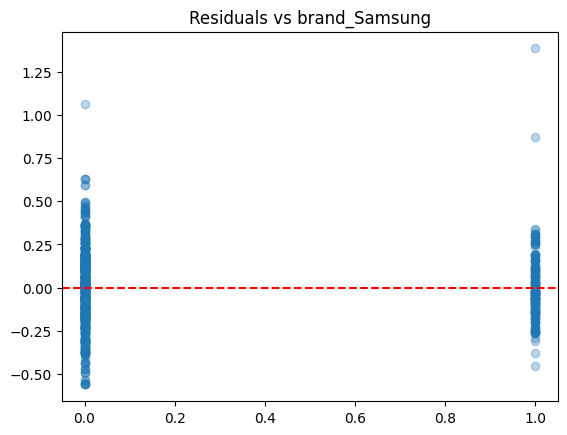

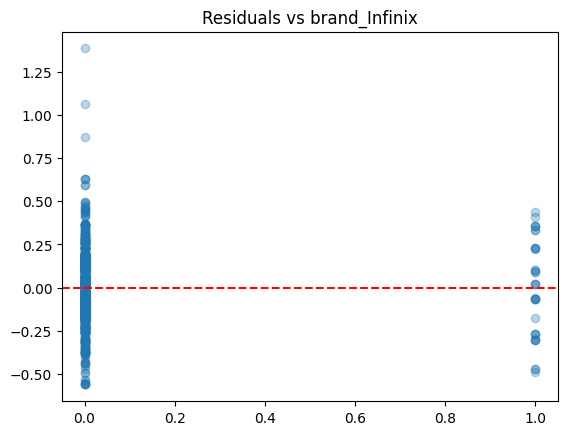

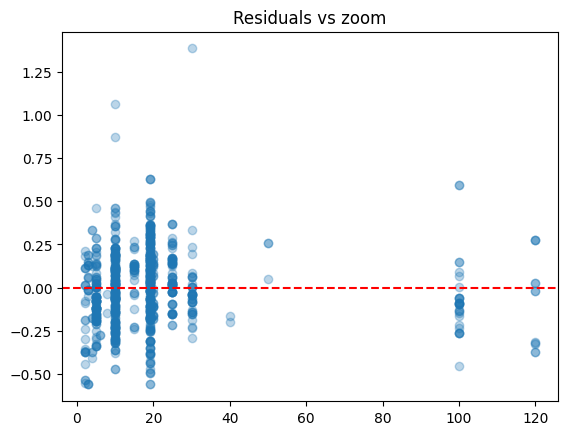

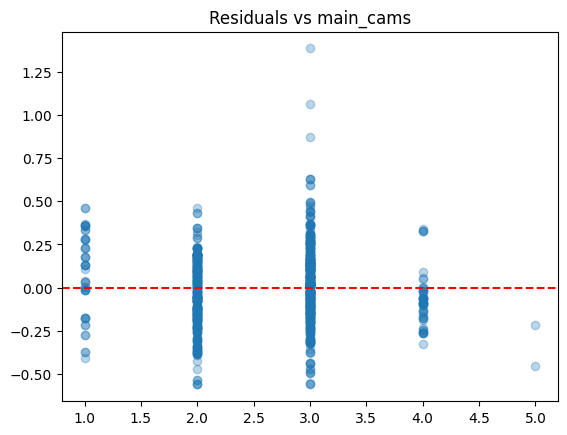

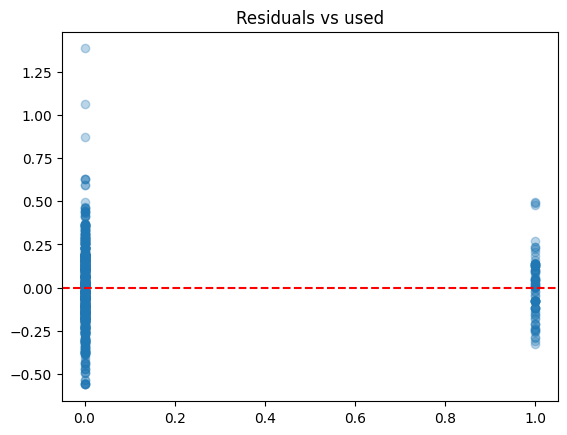

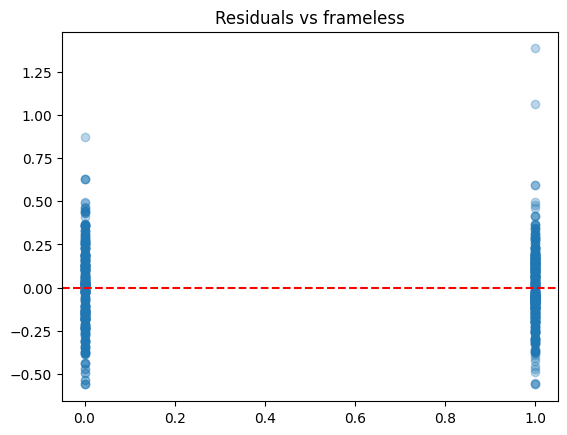

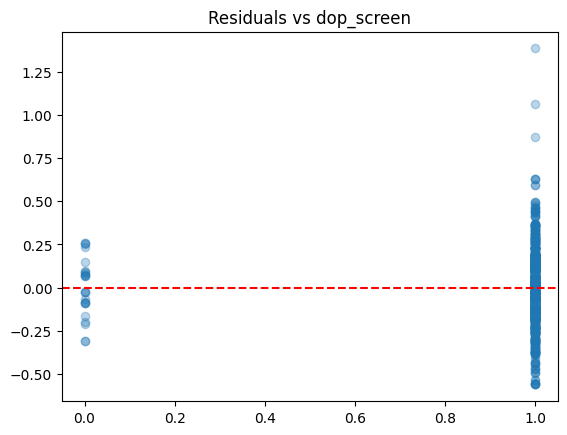

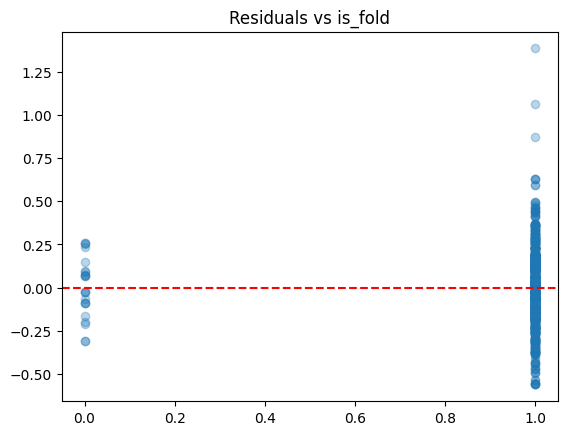

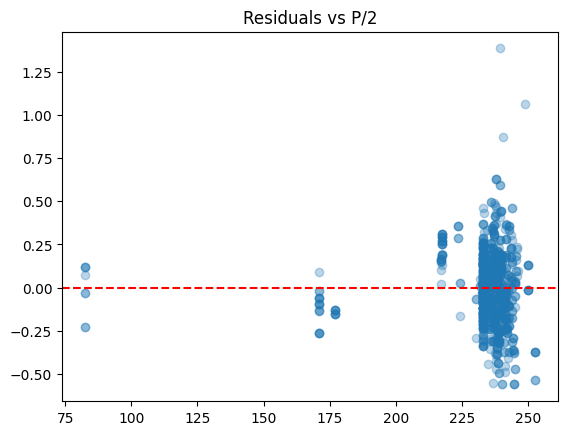

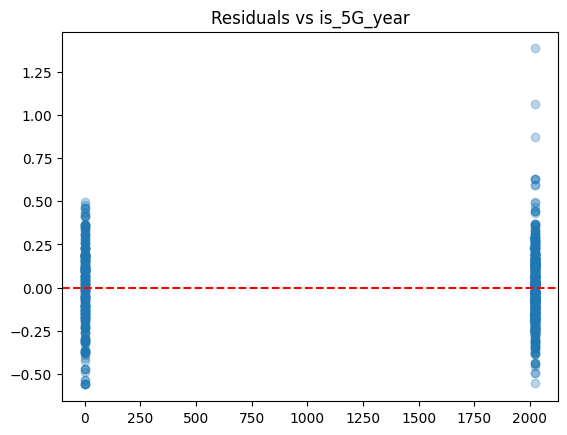

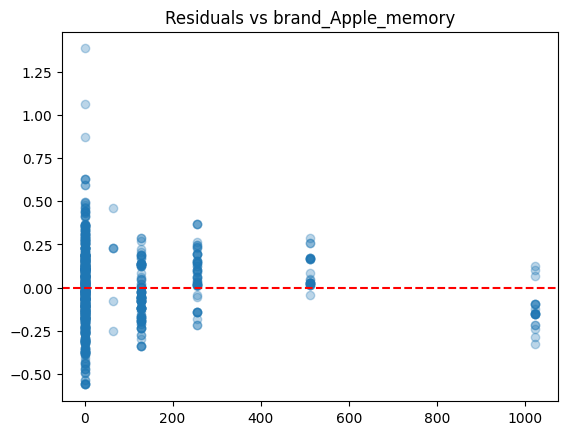

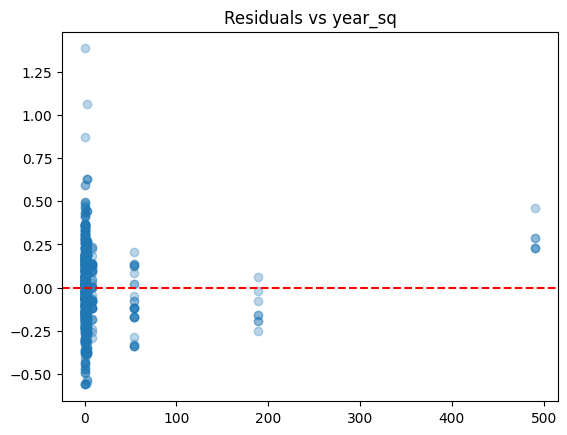

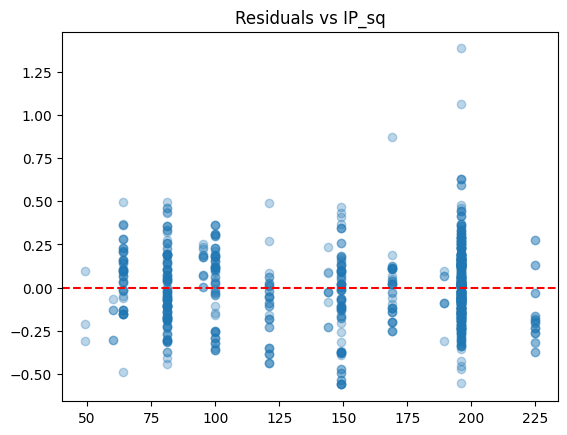

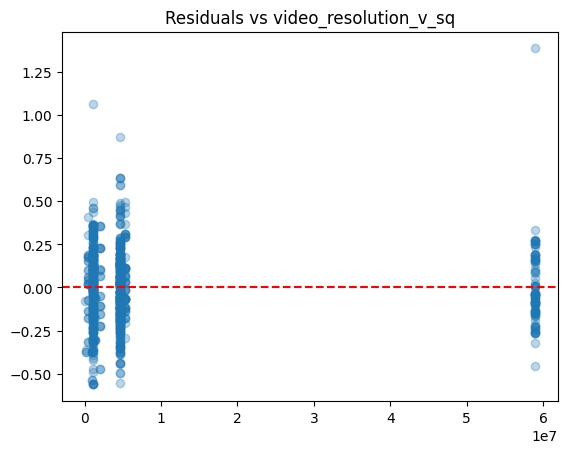

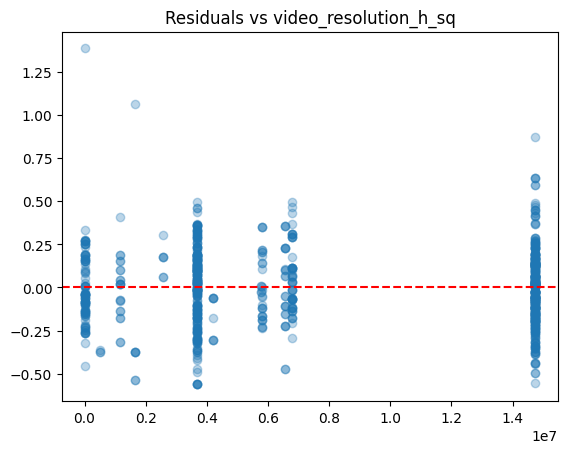

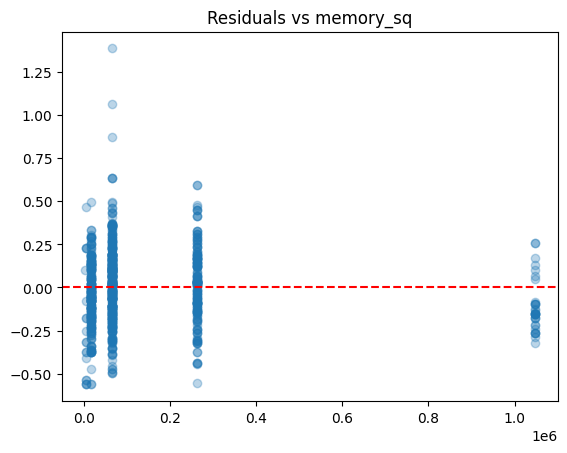

In [1403]:
import matplotlib.pyplot as plt

for col in X_filled_clean.columns:
    plt.scatter(X_filled_clean[col], residuals, alpha=0.3)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {col}")
    plt.show()
